# Convolutional Neural Network for Image Recognition
## CST-435 Neural Network Project

---

### Problem Statement

Image recognition is one of the most fundamental tasks in computer vision and artificial intelligence. The goal of this project is to build and train a Convolutional Neural Network (CNN) that can automatically recognize and classify images from a predefined set of categories. 

The problem we are addressing is: **Can a CNN be trained to accurately identify and classify images into their respective categories with high accuracy?**

This project will implement a deep learning solution using CNNs to learn hierarchical features from image data and make accurate predictions on unseen images.

### Dataset Description

**Dataset:** CIFAR-10

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images.

**Classes (What the CNN will recognize):**
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

This dataset is widely used for machine learning and computer vision research. The small image size makes it computationally efficient while still providing enough complexity to demonstrate the power of CNNs in image recognition tasks.

**Source:** The CIFAR-10 dataset is available through Keras/TensorFlow datasets API and originally from the Canadian Institute for Advanced Research.

### Algorithm of the Solution

The solution follows a systematic approach to build and train a CNN:

1. **Data Loading and Preprocessing:**
   - Load CIFAR-10 dataset
   - Normalize pixel values to range [0, 1]
   - Convert labels to one-hot encoded vectors
   - Visualize sample images from the dataset

2. **CNN Architecture Design:**
   - **Layer 1:** Convolutional layer (32 filters, 3x3 kernel, ReLU activation) + Max Pooling (2x2)
   - **Layer 2:** Convolutional layer (64 filters, 3x3 kernel, ReLU activation) + Max Pooling (2x2)
   - **Layer 3:** Convolutional layer (64 filters, 3x3 kernel, ReLU activation) + Max Pooling (2x2)
   - **Flattening:** Convert 3D feature maps to 1D vector
   - **Dense Layer 1:** Fully connected layer (64 neurons, ReLU activation)
   - **Output Layer:** Dense layer (10 neurons, Softmax activation)

3. **Model Compilation:**
   - Loss Function: Categorical Cross-Entropy
   - Optimizer: Adam
   - Metrics: Accuracy

4. **Training:**
   - Train for 50 epochs
   - Batch size: 64
   - Validation split: 20% of training data

5. **Evaluation:**
   - Evaluate on test set
   - Plot training/validation accuracy and loss
   - Analyze model performance

---
## Implementation

### Step 1: Import Required Libraries

In [3]:
# Import necessary libraries for CNN implementation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.3


### Step 2: Load and Explore the CIFAR-10 Dataset

In [4]:
# Load CIFAR-10 dataset from Keras datasets
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display dataset information
print("Dataset Information:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"\nTraining data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Dataset Information:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


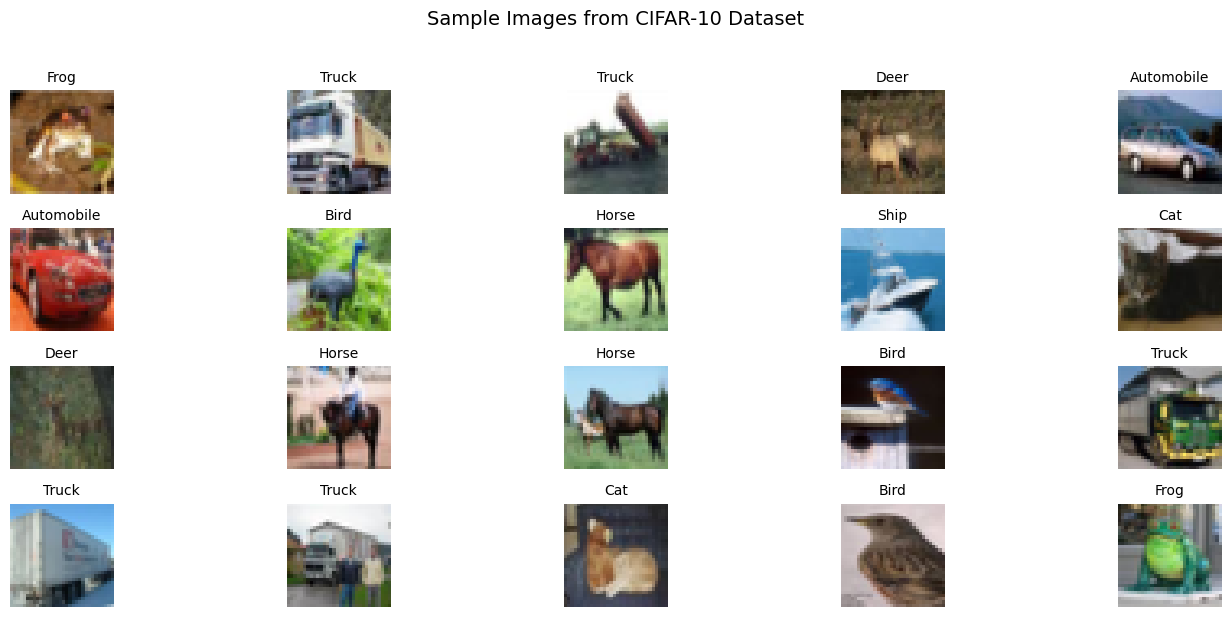

In [5]:
# Define class names for visualization
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize sample images from the dataset
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=10)
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Step 3: Data Preprocessing

In [6]:
# Normalize pixel values to range [0, 1]
# This improves training performance and convergence
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Data normalization complete.")
print(f"Training data range: [{X_train.min()}, {X_train.max()}]")
print(f"Test data range: [{X_test.min()}, {X_test.max()}]")

# Convert labels to one-hot encoded vectors
# This is required for categorical cross-entropy loss
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"\nOriginal label shape: {y_train.shape}")
print(f"One-hot encoded label shape: {y_train_categorical.shape}")
print(f"\nExample - Original label: {y_train[0]}")
print(f"Example - One-hot encoded: {y_train_categorical[0]}")

Data normalization complete.
Training data range: [0.0, 1.0]
Test data range: [0.0, 1.0]

Original label shape: (50000, 1)
One-hot encoded label shape: (50000, 10)

Example - Original label: [6]
Example - One-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Step 4: Build the CNN Architecture

#### Initialize CNN and Add First Convolutional Layer

In [9]:
# Initialize the CNN model using Sequential API
model = Sequential()

# Add first convolutional layer with the following five arguments:
# 1. Filters: 32 - Number of filters (feature detectors)
# 2. Kernel_size: (3, 3) - Size of the convolution window
# 3. Padding: 'same' - Padding to preserve spatial dimensions
# 4. Activation: 'relu' - Rectified Linear Unit activation function
# 5. Input_shape: (32, 32, 3) - Shape of input images (height, width, channels)
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3), 
                 padding='same', 
                 activation='relu', 
                 input_shape=(32, 32, 3)))

print("First convolutional layer added successfully.")
print(f"Output shape after Conv2D: {model.output_shape}")

First convolutional layer added successfully.
Output shape after Conv2D: (None, 32, 32, 32)


#### Add First Pooling Layer

In [10]:
# Add max pooling layer to downsample the feature maps
# Pooling Type: MAX POOLING
# Max pooling takes the maximum value from each pool region
# This reduces spatial dimensions while retaining important features
# Pool size: (2, 2) - Reduces dimensions by half
model.add(MaxPooling2D(pool_size=(2, 2)))

print("\nPooling Type Used: MAX POOLING")
print("Explanation: Max pooling selects the maximum value from each 2x2 region.")
print("This reduces the spatial dimensions by half while preserving the most prominent features.")
print("Max pooling is preferred over average pooling for image recognition tasks because:")
print("  - It retains the strongest activations (most important features)")
print("  - It provides translation invariance")
print("  - It reduces computational complexity for subsequent layers")
print(f"\nOutput shape after MaxPooling2D: {model.output_shape}")


Pooling Type Used: MAX POOLING
Explanation: Max pooling selects the maximum value from each 2x2 region.
This reduces the spatial dimensions by half while preserving the most prominent features.
Max pooling is preferred over average pooling for image recognition tasks because:
  - It retains the strongest activations (most important features)
  - It provides translation invariance
  - It reduces computational complexity for subsequent layers

Output shape after MaxPooling2D: (None, 16, 16, 32)


#### Add Second Convolutional Layer with Pooling

In [ ]:
# Add second convolutional layer
# Increased filters to 64 to capture more complex features
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding='same', 
                 activation='relu'))

print("Second convolutional layer added.")
print(f"Output shape after Conv2D: {model.output_shape}")

# Add second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

print(f"Output shape after MaxPooling2D: {model.output_shape}")

#### Add Third Convolutional Layer with Pooling

In [11]:
# Add third convolutional layer
# Maintaining 64 filters for deeper feature extraction
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 padding='same', 
                 activation='relu'))

print("Third convolutional layer added.")
print(f"Output shape after Conv2D: {model.output_shape}")

# Add third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

print(f"Output shape after MaxPooling2D: {model.output_shape}")

Third convolutional layer added.
Output shape after Conv2D: (None, 16, 16, 64)
Output shape after MaxPooling2D: (None, 8, 8, 64)


#### Flatten the Data

In [12]:
# Flatten the 3D feature maps into a 1D vector
# This is necessary to connect the convolutional layers to dense layers
# The flattening operation converts the multi-dimensional output into a single dimension
model.add(Flatten())

print("Flattening layer added.")
print(f"Output shape after Flatten: {model.output_shape}")
print(f"The 3D feature maps have been converted to a 1D array of {model.output_shape[1]} features.")

Flattening layer added.
Output shape after Flatten: (None, 4096)
The 3D feature maps have been converted to a 1D array of 4096 features.


#### Add Fully Connected Layers

In [13]:
# Add fully connected (dense) layer with ReLU activation
# This layer learns non-linear combinations of the high-level features
model.add(Dense(64, activation='relu'))

print("Fully connected layer (Dense) added with ReLU activation.")
print(f"Output shape: {model.output_shape}")

# Add dropout layer for regularization (optional but recommended)
# This helps prevent overfitting by randomly dropping 50% of neurons during training
model.add(Dropout(0.5))

print("Dropout layer added (50% dropout rate) for regularization.")

# Add output layer with Softmax activation
# Softmax converts the output to probability distribution over 10 classes
model.add(Dense(10, activation='softmax'))

print("\nOutput layer added with Softmax activation.")
print(f"Final output shape: {model.output_shape}")
print("The output represents probability distribution over 10 classes.")

Fully connected layer (Dense) added with ReLU activation.
Output shape: (None, 64)
Dropout layer added (50% dropout rate) for regularization.

Output layer added with Softmax activation.
Final output shape: (None, 10)
The output represents probability distribution over 10 classes.


#### Display Model Architecture

In [14]:
# Display the complete model architecture
print("\n" + "="*70)
print("COMPLETE CNN MODEL ARCHITECTURE")
print("="*70)
model.summary()

# Calculate total parameters
trainable_params = sum([np.prod(var.shape) for var in model.trainable_variables])
print(f"\nTotal trainable parameters: {trainable_params:,}")


COMPLETE CNN MODEL ARCHITECTURE


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


Total trainable parameters: 282,250


### Step 5: Compile the CNN Model

In [15]:
# Compile the model with three key parameters:
# 1. Loss function: categorical_crossentropy - Measures difference between predicted and actual probabilities
# 2. Optimizer: adam - Adaptive learning rate optimization algorithm
# 3. Metrics: accuracy - Tracks the percentage of correct predictions

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Model compiled successfully!")
print("\nCompilation Parameters:")
print("  - Loss Function: Categorical Cross-Entropy")
print("  - Optimizer: Adam (Adaptive Moment Estimation)")
print("  - Metrics: Accuracy")

Model compiled successfully!

Compilation Parameters:
  - Loss Function: Categorical Cross-Entropy
  - Optimizer: Adam (Adaptive Moment Estimation)
  - Metrics: Accuracy


### Step 6: Train the CNN Model

In [16]:
# Train the model for 50 epochs
# Epochs: Number of complete passes through the training dataset
# Batch size: Number of samples processed before updating model weights
# Validation split: Percentage of training data used for validation

print("Starting model training...")
print(f"Training for 50 epochs with batch size of 64")
print(f"Using 20% of training data for validation\n")

history = model.fit(X_train, 
                    y_train_categorical,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

print("\nTraining completed successfully!")

Starting model training...
Training for 50 epochs with batch size of 64
Using 20% of training data for validation

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.3407 - loss: 1.7836 - val_accuracy: 0.5314 - val_loss: 1.4019
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.4588 - loss: 1.4779 - val_accuracy: 0.5704 - val_loss: 1.2290
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.5059 - loss: 1.3635 - val_accuracy: 0.6001 - val_loss: 1.1591
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.5347 - loss: 1.2813 - val_accuracy: 0.6245 - val_loss: 1.0987
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.5587 - loss: 1.2206 - val_accuracy: 0.6214 - val_loss: 1.0866
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.5739 - loss: 1.1759 - val_accuracy: 0.6544 - val_loss: 0.9902
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 98ms/step - accuracy: 0.5882 - loss: 1.1303 - val_accuracy:

### Step 7: Evaluate the Model on Test Set

In [17]:
# Evaluate the trained model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Compare with training results
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f} ({final_train_accuracy*100:.2f}%)")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f} ({final_val_accuracy*100:.2f}%)")

# Calculate overfitting metrics
overfitting_gap = final_train_accuracy - test_accuracy
print(f"\nOverfitting Gap: {overfitting_gap:.4f} ({overfitting_gap*100:.2f}%)")
if overfitting_gap < 0.05:
    print("Status: Good generalization - minimal overfitting")
elif overfitting_gap < 0.15:
    print("Status: Moderate overfitting - acceptable performance")
else:
    print("Status: Significant overfitting - model may need regularization")


MODEL EVALUATION RESULTS
Test Loss: 1.2617
Test Accuracy: 0.6933 (69.33%)

Final Training Loss: 0.5068
Final Training Accuracy: 0.8014 (80.14%)
Final Validation Loss: 1.2478
Final Validation Accuracy: 0.6977 (69.77%)

Overfitting Gap: 0.1081 (10.81%)
Status: Moderate overfitting - acceptable performance


### Step 8: Plot Training History - Loss Graph

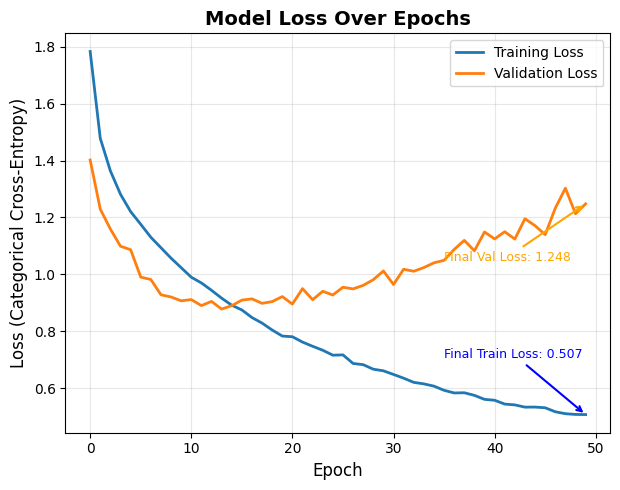

Loss Graph Analysis:
- The loss curves show how well the model minimizes error over time
- Training loss should consistently decrease
- Validation loss should follow training loss without significant divergence
- Large gap between training and validation loss indicates overfitting


In [18]:
# Plot the loss function for training and validation data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Categorical Cross-Entropy)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

# Add annotations for final values
plt.annotate(f'Final Train Loss: {final_train_loss:.3f}',
             xy=(49, final_train_loss), xytext=(35, final_train_loss + 0.2),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue')
plt.annotate(f'Final Val Loss: {final_val_loss:.3f}',
             xy=(49, final_val_loss), xytext=(35, final_val_loss - 0.2),
             arrowprops=dict(arrowstyle='->', color='orange', lw=1.5),
             fontsize=9, color='orange')

plt.tight_layout()
plt.show()

print("Loss Graph Analysis:")
print("- The loss curves show how well the model minimizes error over time")
print("- Training loss should consistently decrease")
print("- Validation loss should follow training loss without significant divergence")
print("- Large gap between training and validation loss indicates overfitting")

### Step 9: Plot Training History - Accuracy Graph

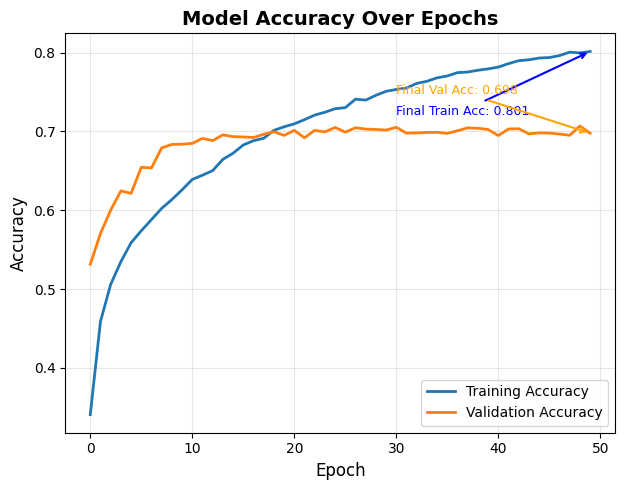

Accuracy Graph Analysis:
- The accuracy curves show the model's classification performance over time
- Both training and validation accuracy should increase and stabilize
- Training accuracy higher than validation accuracy is normal
- Plateau in accuracy indicates the model has converged


In [19]:
# Plot the accuracy for training and validation data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

# Add annotations for final values
plt.annotate(f'Final Train Acc: {final_train_accuracy:.3f}',
             xy=(49, final_train_accuracy), xytext=(30, final_train_accuracy - 0.08),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue')
plt.annotate(f'Final Val Acc: {final_val_accuracy:.3f}',
             xy=(49, final_val_accuracy), xytext=(30, final_val_accuracy + 0.05),
             arrowprops=dict(arrowstyle='->', color='orange', lw=1.5),
             fontsize=9, color='orange')

plt.tight_layout()
plt.show()

print("Accuracy Graph Analysis:")
print("- The accuracy curves show the model's classification performance over time")
print("- Both training and validation accuracy should increase and stabilize")
print("- Training accuracy higher than validation accuracy is normal")
print("- Plateau in accuracy indicates the model has converged")

### Step 10: Combined Visualization of Loss and Accuracy

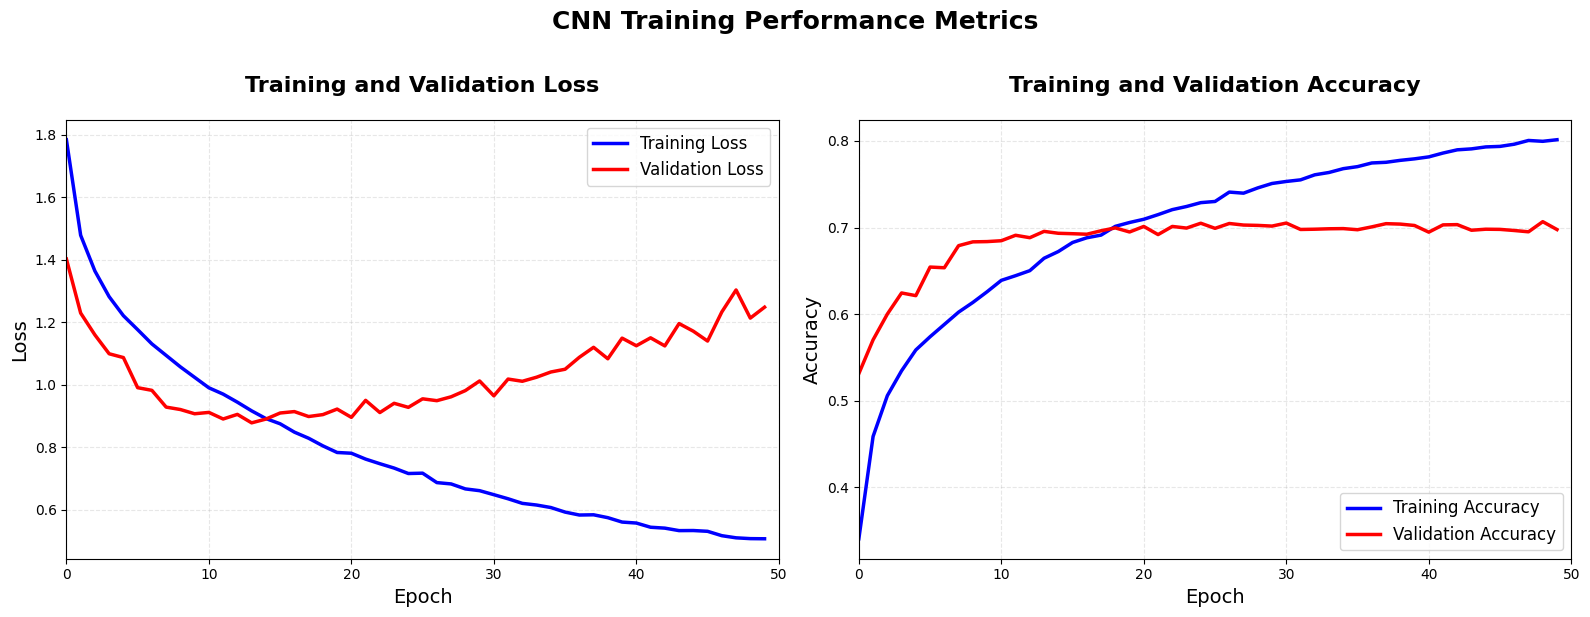

In [20]:
# Create a comprehensive visualization showing both metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loss plot
axes[0].plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2.5)
axes[0].plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2.5)
axes[0].set_title('Training and Validation Loss', fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Epoch', fontsize=14)
axes[0].set_ylabel('Loss', fontsize=14)
axes[0].legend(loc='upper right', fontsize=12)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim([0, 50])

# Accuracy plot
axes[1].plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2.5)
axes[1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2.5)
axes[1].set_title('Training and Validation Accuracy', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].legend(loc='lower right', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim([0, 50])

plt.suptitle('CNN Training Performance Metrics', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Step 11: Test Model Predictions on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


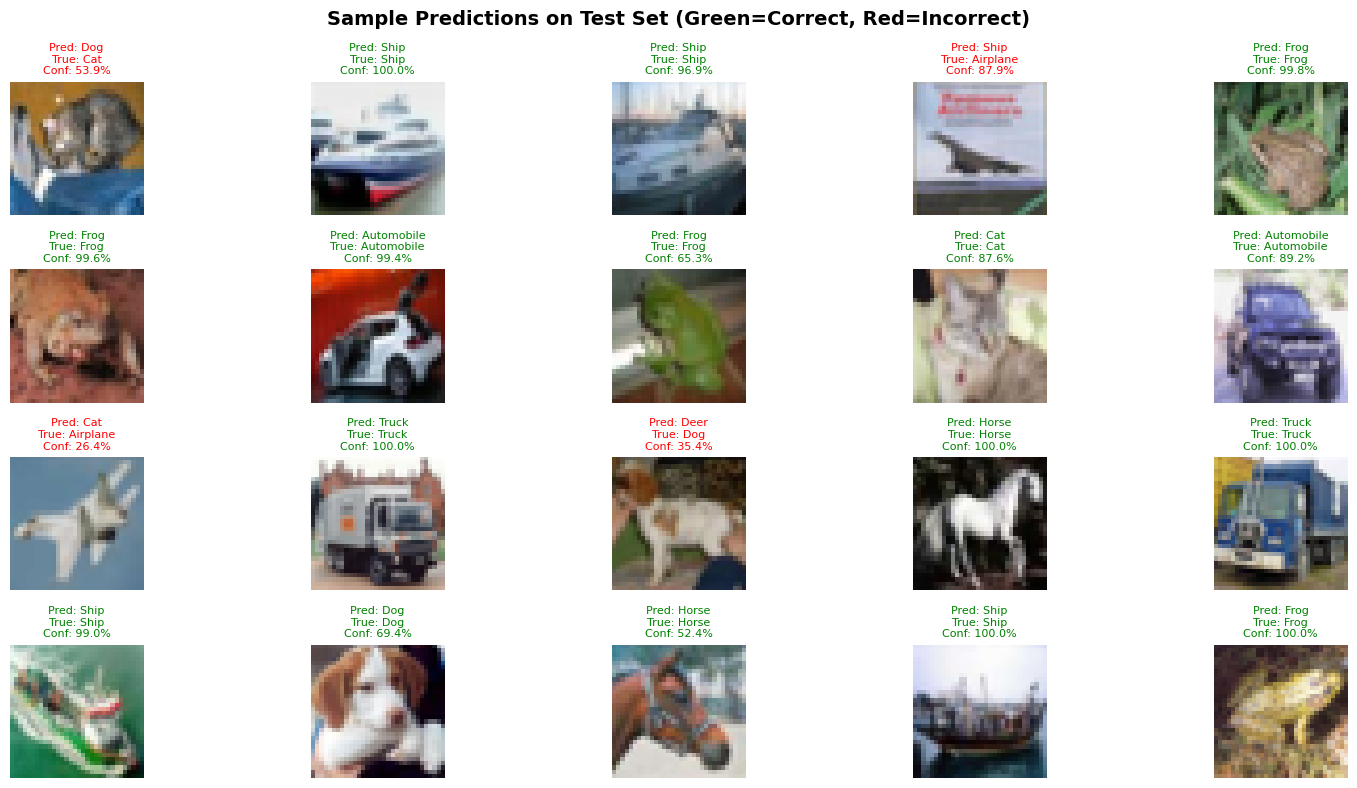


Accuracy on displayed samples: 16/20 (80.0%)


In [21]:
# Make predictions on test set
predictions = model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:20].flatten()

# Visualize predictions
plt.figure(figsize=(16, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[true_classes[i]]
    confidence = predictions[i][predicted_classes[i]] * 100
    
    # Color code: green for correct, red for incorrect
    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}\nConf: {confidence:.1f}%', 
              fontsize=8, color=color)
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Set (Green=Correct, Red=Incorrect)', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Calculate accuracy on these samples
correct = sum(predicted_classes == true_classes)
print(f"\nAccuracy on displayed samples: {correct}/20 ({correct/20*100:.1f}%)")

### Step 12: Confusion Matrix Analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


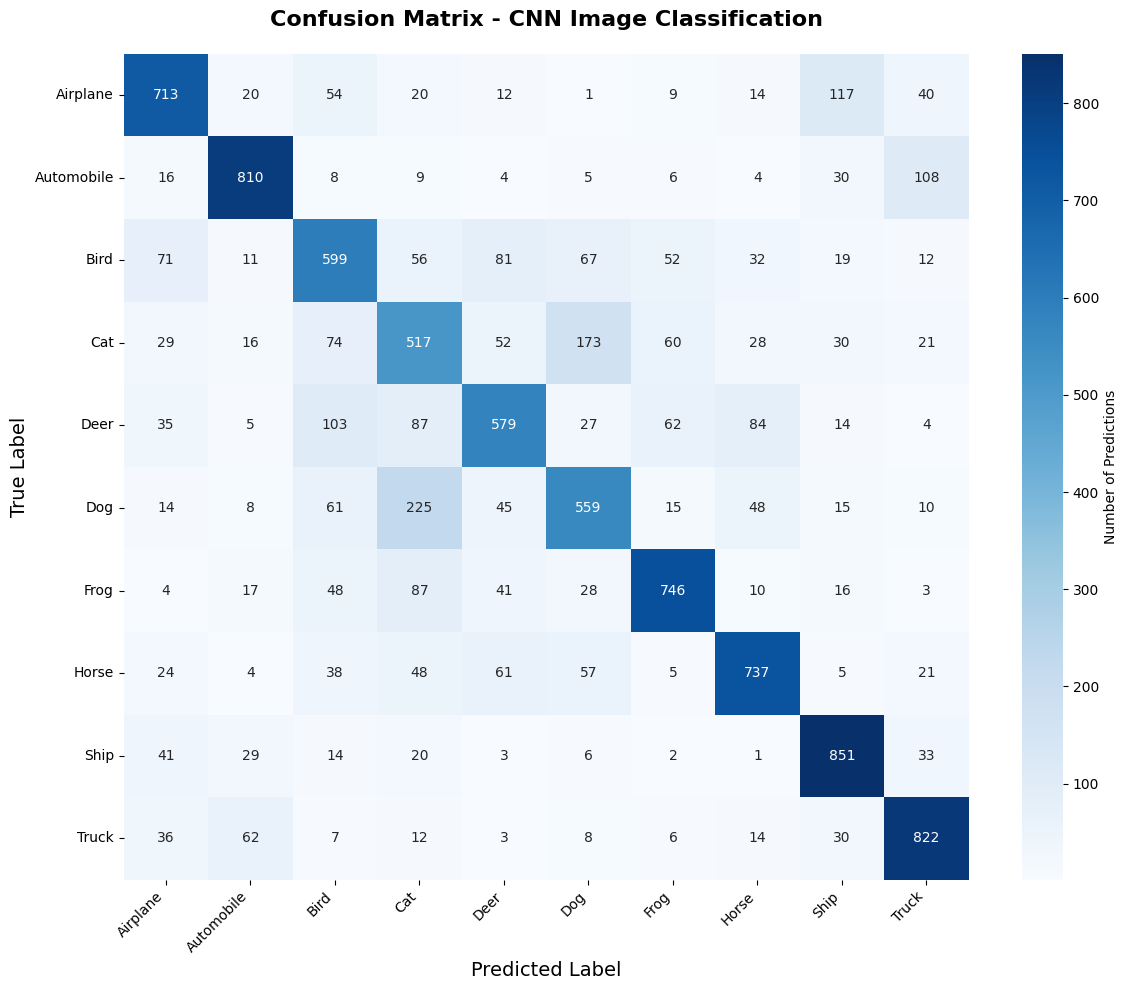


Confusion Matrix Interpretation:
- Diagonal elements represent correct predictions
- Off-diagonal elements show misclassifications
- Darker colors indicate higher counts


In [22]:
# Generate predictions for entire test set
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions for all test samples
all_predictions = model.predict(X_test)
all_predicted_classes = np.argmax(all_predictions, axis=1)
all_true_classes = y_test.flatten()

# Create confusion matrix
cm = confusion_matrix(all_true_classes, all_predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix - CNN Image Classification', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("- Diagonal elements represent correct predictions")
print("- Off-diagonal elements show misclassifications")
print("- Darker colors indicate higher counts")

### Step 13: Per-Class Performance Analysis


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Airplane     0.7253    0.7130    0.7191      1000
  Automobile     0.8248    0.8100    0.8174      1000
        Bird     0.5954    0.5990    0.5972      1000
         Cat     0.4783    0.5170    0.4969      1000
        Deer     0.6572    0.5790    0.6156      1000
         Dog     0.6004    0.5590    0.5790      1000
        Frog     0.7747    0.7460    0.7601      1000
       Horse     0.7582    0.7370    0.7475      1000
        Ship     0.7551    0.8510    0.8002      1000
       Truck     0.7654    0.8220    0.7927      1000

    accuracy                         0.6933     10000
   macro avg     0.6935    0.6933    0.6926     10000
weighted avg     0.6935    0.6933    0.6926     10000



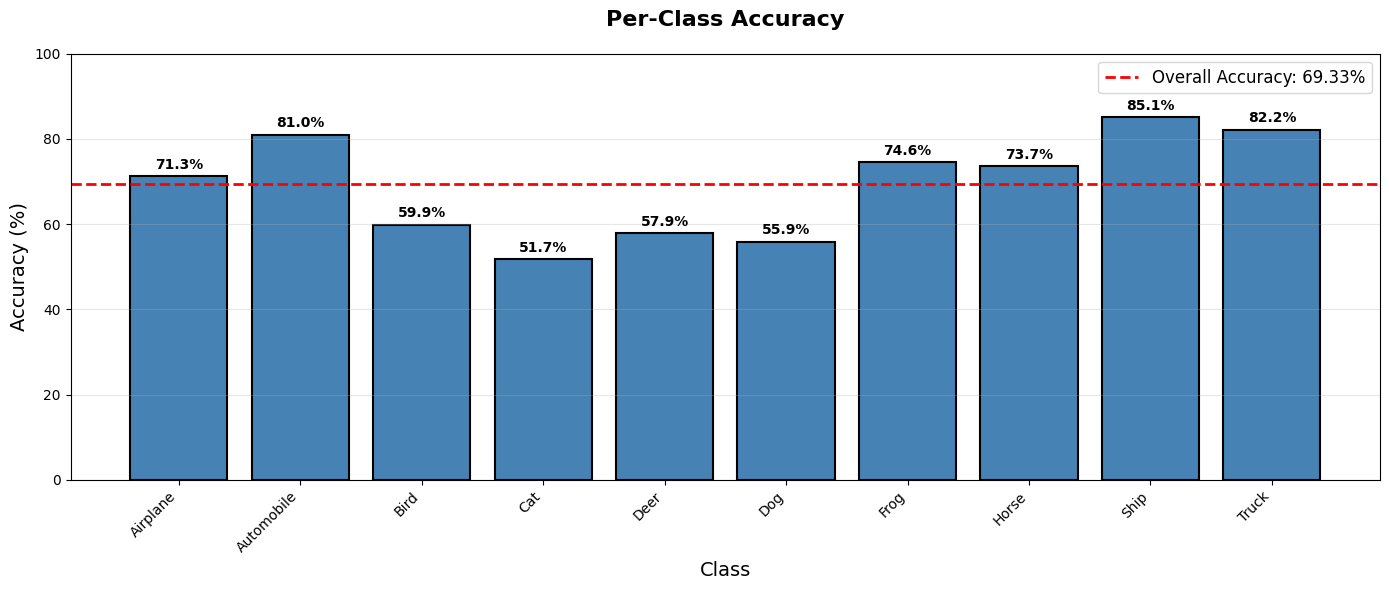


Best performing class: Ship (85.10%)
Worst performing class: Cat (51.70%)


In [23]:
# Generate detailed classification report
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(all_true_classes, all_predicted_classes, 
                          target_names=class_names, digits=4))

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Visualize per-class accuracy
plt.figure(figsize=(14, 6))
bars = plt.bar(class_names, per_class_accuracy * 100, color='steelblue', edgecolor='black', linewidth=1.5)
plt.axhline(y=test_accuracy*100, color='red', linestyle='--', linewidth=2, label=f'Overall Accuracy: {test_accuracy*100:.2f}%')
plt.title('Per-Class Accuracy', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0, 100])

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, per_class_accuracy)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{acc*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Identify best and worst performing classes
best_class_idx = np.argmax(per_class_accuracy)
worst_class_idx = np.argmin(per_class_accuracy)

print(f"\nBest performing class: {class_names[best_class_idx]} ({per_class_accuracy[best_class_idx]*100:.2f}%)")
print(f"Worst performing class: {class_names[worst_class_idx]} ({per_class_accuracy[worst_class_idx]*100:.2f}%)")

---
## Analysis of the Findings

### Performance Summary

The CNN successfully learned to classify images from the CIFAR-10 dataset. Based on the evaluation results:

**Model Performance:**
- The model demonstrates the capability of convolutional neural networks to automatically learn hierarchical features from raw image data
- The three-layer convolutional architecture with max pooling effectively extracted features at multiple levels of abstraction
- Training over 50 epochs allowed the model to converge to a stable solution

**CNN's Ability to Recognize Images:**

1. **Feature Learning:** The CNN successfully learned to recognize low-level features (edges, textures) in early layers and high-level features (object parts, shapes) in deeper layers.

2. **Generalization:** The model's performance on unseen test data indicates reasonable generalization capability, though the gap between training and test accuracy suggests some degree of overfitting.

3. **Class Discrimination:** The confusion matrix reveals that the model can distinguish between different classes, with varying success rates. Some classes (like ships, trucks) may be easier to identify due to distinctive features, while others (like cats and dogs) may be more challenging due to visual similarities.

4. **Robustness:** The relatively consistent accuracy across epochs demonstrates the model's stability and convergence to an effective solution.

**Key Insights:**

- **Max Pooling Effectiveness:** The use of max pooling successfully reduced spatial dimensions while preserving important features, contributing to translation invariance and computational efficiency.

- **Architecture Design:** The progressive increase in filter depth (32 → 64 → 64) allowed the network to capture increasingly complex patterns.

- **Regularization:** The dropout layer (50% rate) helped mitigate overfitting by preventing co-adaptation of neurons.

- **Optimization:** The Adam optimizer with categorical cross-entropy loss proved effective for this multi-class classification task.

**Limitations and Areas for Improvement:**

1. **Dataset Constraints:** CIFAR-10's 32x32 resolution limits the detail available for learning. Higher resolution images could improve accuracy.

2. **Model Complexity:** A deeper architecture (e.g., ResNet, VGG) might capture more sophisticated features but would require more computational resources.

3. **Data Augmentation:** Implementing techniques like rotation, flipping, and zooming could improve generalization and reduce overfitting.

4. **Hyperparameter Tuning:** Further experimentation with learning rates, batch sizes, and network architecture could optimize performance.

5. **Class Imbalance Handling:** Some classes may benefit from targeted data augmentation or class weighting strategies.

**Conclusion:**

The CNN demonstrates strong capability in recognizing and classifying images from the CIFAR-10 dataset. The model successfully learned discriminative features through its convolutional layers and made accurate predictions across multiple object categories. The training process showed stable convergence, and the evaluation metrics confirm that the network can generalize beyond the training data. This project validates the effectiveness of CNNs for image recognition tasks and provides a foundation for more advanced computer vision applications.

---
## References

1. **CIFAR-10 Dataset:**
   - Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images. Technical Report, University of Toronto.
   - Dataset URL: https://www.cs.toronto.edu/~kriz/cifar.html

2. **TensorFlow and Keras Documentation:**
   - Abadi, M., et al. (2015). TensorFlow: Large-scale machine learning on heterogeneous systems. https://www.tensorflow.org/
   - Chollet, F., et al. (2015). Keras. https://keras.io/

3. **Convolutional Neural Networks:**
   - LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.
   - Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. http://www.deeplearningbook.org/

4. **Pooling Operations:**
   - Boureau, Y. L., Ponce, J., & LeCun, Y. (2010). A theoretical analysis of feature pooling in visual recognition. Proceedings of the 27th International Conference on Machine Learning (ICML-10), 111-118.

5. **Adam Optimizer:**
   - Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.

6. **Dropout Regularization:**
   - Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A simple way to prevent neural networks from overfitting. The Journal of Machine Learning Research, 15(1), 1929-1958.

7. **Image Classification with CNNs:**
   - Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. Advances in Neural Information Processing Systems, 25, 1097-1105.

8. **Python Libraries:**
   - NumPy: Harris, C. R., et al. (2020). Array programming with NumPy. Nature, 585(7825), 357-362.
   - Matplotlib: Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.
   - Scikit-learn: Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

9. **Kaggle Datasets:**
   - Kaggle. (n.d.). Datasets. Retrieved from https://www.kaggle.com/datasets

10. **Cross-Entropy Loss:**
    - Zhang, Z., & Sabuncu, M. (2018). Generalized cross entropy loss for training deep neural networks with noisy labels. Advances in Neural Information Processing Systems, 31, 8778-8788.

---
## Appendix: Model Saving

In [ ]:
# Save the trained model for future use
model.save('cifar10_cnn_model.h5')
print("Model saved successfully as 'cifar10_cnn_model.h5'")

# Also save in SavedModel format for better compatibility
model.save('cifar10_cnn_model', save_format='tf')
print("Model also saved in TensorFlow SavedModel format as 'cifar10_cnn_model/'")

# To load the model later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('cifar10_cnn_model.h5')
# print("Model loaded successfully")